# Classification Project: Handwritten Digits and Dog Breeds

### Dataset Descriptions: Handwritten Digits (MNIST dataset from Kaggle)
**Format:** Grayscale images of 28x28 pixels.
**Size:** 60,000 training images and 10,000 testing images.
**Target:** Digits from 0 - 9.

### Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from sklearn.metrics import confusion_matrix
from tensorflow.keras.utils import to_categorical
from keras.datasets import mnist
import seaborn as sns

np.random.seed(0)

### Loading & exploring the training and testing datasets

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
# Exploring the data
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)


(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


### Visualizing

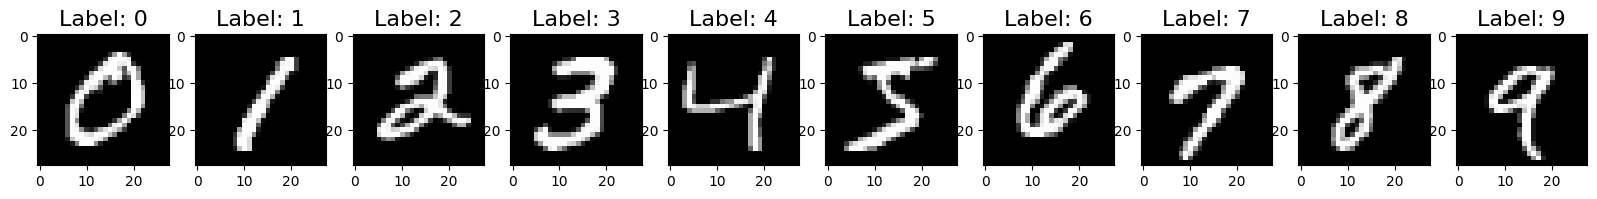

In [4]:
num_classes = 10
f, ax = plt.subplots(1, num_classes, figsize=(20,20))

for i in range(0, num_classes):
  sample = x_train[y_train == i][0]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Label: {}".format(i), fontsize=16)

In [5]:
#To see our labels
for i in range(10):
  print(y_train[i])

5
0
4
1
9
2
1
3
1
4


In [6]:
# To encode the labels using onehotencoding
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

for i in range(10):
  print(y_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


### Prepare the Data

### Models

In [7]:
# Normalize by dividing by white (255)
x_train = x_train / 255.0
x_test = x_test / 255.0

In [8]:
# Reshape
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
print(x_train.shape)

(60000, 784)


In [9]:
model = Sequential()

model.add(Dense(128, input_shape=(784,), activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Training

In [10]:
batch_size = 512
epochs = 10
model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/10


118/118 [==============================] - 2s 7ms/step - loss: 0.6029 - accuracy: 0.8232
Epoch 2/10
118/118 [==============================] - 1s 6ms/step - loss: 0.2255 - accuracy: 0.9351
Epoch 3/10
118/118 [==============================] - 1s 6ms/step - loss: 0.1636 - accuracy: 0.9527
Epoch 4/10
118/118 [==============================] - 1s 5ms/step - loss: 0.1295 - accuracy: 0.9613
Epoch 5/10
118/118 [==============================] - 1s 5ms/step - loss: 0.1068 - accuracy: 0.9684
Epoch 6/10
118/118 [==============================] - 1s 5ms/step - loss: 0.0919 - accuracy: 0.9725
Epoch 7/10
118/118 [==============================] - 1s 5ms/step - loss: 0.0791 - accuracy: 0.9762
Epoch 8/10
118/118 [==============================] - 1s 5ms/step - loss: 0.0691 - accuracy: 0.9799
Epoch 9/10
118/118 [==============================] - 1s 6ms/step - loss: 0.0611 - accuracy: 0.9809
Epoch 10/10
118/118 [==============================] - 1s 6ms/step - loss: 0.0531 - accuracy: 0.98

### Evaluation of model using test dataset

In [11]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("Test Loss: {}, Test Accuracy: {}".format(test_loss, test_acc))

313/313 - 1s - loss: 0.0722 - accuracy: 0.9775 - 655ms/epoch - 2ms/step
Test Loss: 0.07222791761159897, Test Accuracy: 0.9775000214576721


### Prediction

In [12]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(y_pred)
print(y_pred_classes)

313/313 [==============================] - 1s 2ms/step
[[3.0125238e-07 2.1427702e-06 4.5055283e-05 ... 9.9982113e-01
  1.3349442e-07 2.6743637e-06]
 [8.2089190e-07 4.2854172e-05 9.9993920e-01 ... 5.9377320e-10
  8.3906468e-07 6.8571510e-10]
 [4.1800733e-05 9.9694723e-01 4.1410478e-04 ... 1.2312668e-03
  5.0622004e-04 2.7293252e-05]
 ...
 [5.7171012e-10 4.5596320e-08 2.8417424e-09 ... 6.2890276e-06
  2.1659881e-07 7.1135628e-06]
 [1.4147862e-08 6.4387096e-09 8.6092036e-11 ... 1.6478115e-08
  1.8046104e-06 4.2114070e-08]
 [1.2764918e-08 2.3692532e-09 6.9412120e-09 ... 2.6292000e-13
  1.7924179e-10 5.7860147e-11]]
[7 2 1 ... 4 5 6]


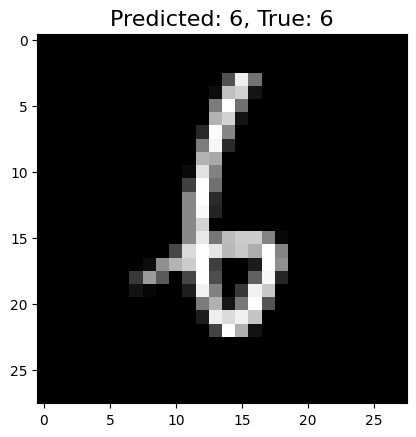

In [13]:
# Random prediction
random_idx = np.random.choice(len(x_test))
x_sample = x_test[random_idx]
y_true = np.argmax(y_test, axis=1)
y_sample_true = y_true[random_idx]
y_sample_pred_class = y_pred_classes[random_idx]

plt.title("Predicted: {}, True: {}".format(y_sample_pred_class, y_sample_true), fontsize=16)
plt.imshow(x_sample.reshape(28, 28), cmap='gray')

### Confusion Matrix

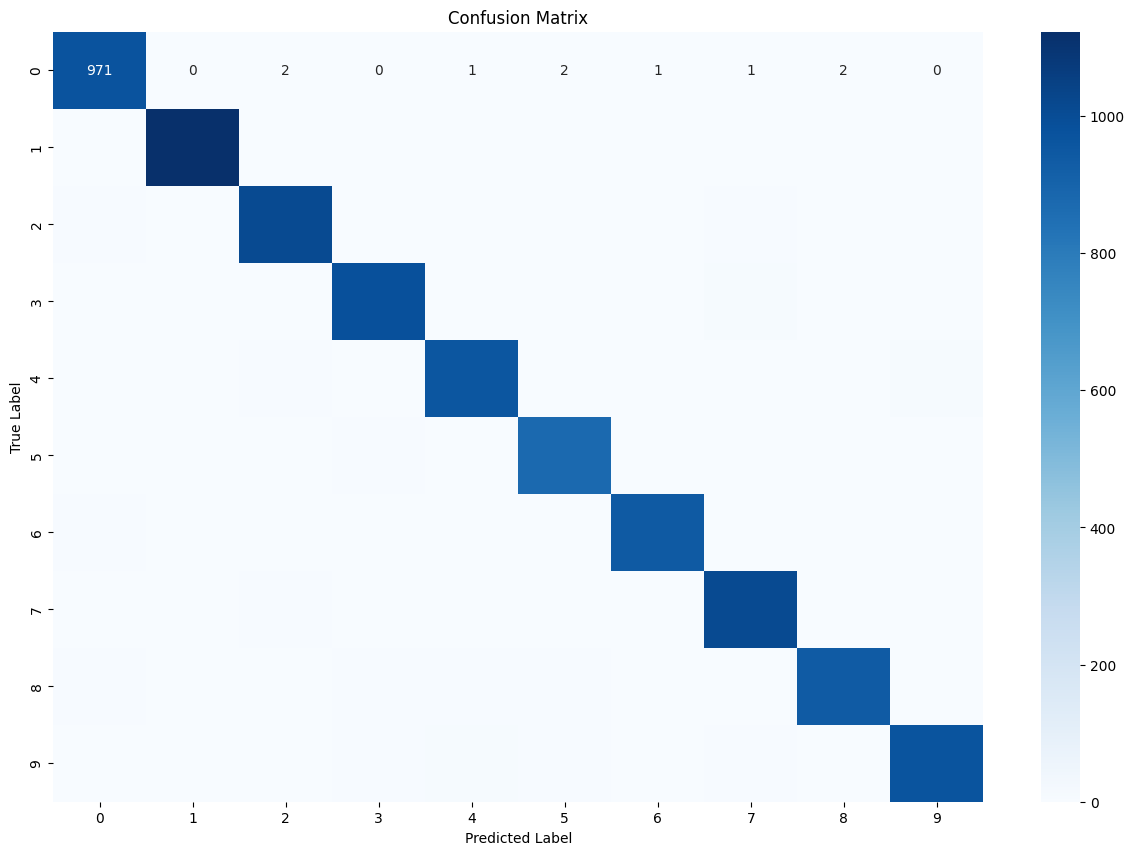

In [14]:
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

#plot
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(confusion_mtx, annot=True, fmt='d', ax=ax, cmap="Blues")
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix');

***We can see that using the confusion matrix helps us see the accuracy of the model. Every column in every row is a class for a digit with our "True label" on the Y axis and the "Predicted Label" on the X-axis***

***From the first row, for every 0 that had a true label of zero, the model predicted 971 zeros. This can be seen for all the other other numbers till 9 which means our model is quite accurate***

# Dataset Description: Dog Breeds (dataset from Kaggle)
**Format:** RGB images of different sizes.
**Size:** 20,000+ images of about 120 dog breeds.
**Target:** Specific dog breeds.

### Importing the necessary libraries

In [102]:
import numpy as np
import cv2
import os
import pandas as pd
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
from IPython.display import display, Image
import PIL.Image
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.applications.nasnet import NASNetLarge
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

### Loading and Exploring the data

In [86]:
IMAGE_SIZE = (128,128)
IMAGE_FULL_SIZE = (128,128,3)

trainMyImageFolder = r"C:/Users/johno/Desktop/EPITA/Fall 2023/Computer Vision - Prof Aurelien Quillet/Projects - Computer Vision/dog-breed-identification"

df = pd.read_csv("C:/Users/johno/Desktop/EPITA/Fall 2023/Computer Vision - Prof Aurelien Quillet/Projects - Computer Vision/dog-breed-identification/labels.csv")
print("head of labels: ")
print("================")

print(df.head())
print(df.describe())

print("Group by labels : ")
grouplabels = df.groupby("breed")["id"].count()
print(grouplabels.head(10))

head of labels: 
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever
                                      id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126
Group by labels : 
breed
affenpinscher                      80
afghan_hound                      116
african_hunting_dog                86
airedale                          107
american_staffordshire_terrier     74
appenzeller                        78
australian_terrier                102
basenji                           110
basset                   

### Visualizing the images

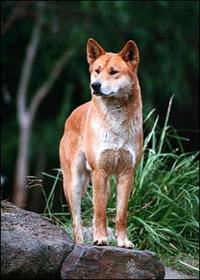

In [87]:
imgPath = "C:/Users/johno/Desktop/EPITA/Fall 2023/Computer Vision - Prof Aurelien Quillet/Projects - Computer Vision/dog-breed-identification/train/00a338a92e4e7bf543340dc849230e75.jpg"
img = cv2.imread(imgPath)
#cv2.imshow("img",img)
#cv2.waitKey(0)

# Convert BGR to RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image using IPython.display
display(PIL.Image.fromarray(img_rgb))

### Preparing all the images and labels

In [88]:
import os

# Creating a new output directory
trainMyImageFolder = "C:/Users/johno/Desktop/EPITA/Fall 2023/Computer Vision - Prof Aurelien Quillet/Projects - Computer Vision/dog-breed-identification/train"
output_directory = "C:/Users/johno/Desktop/EPITA/Fall 2023/Computer Vision - Prof Aurelien Quillet/Projects - Computer Vision/dog-breed-identification/temp"

allImages = []
allLabels = []

for ix, (image_name, breed) in tqdm(enumerate(df[['id', 'breed']].values), total=len(df)):
    img_dir = os.path.join(trainMyImageFolder, image_name + '.jpg')

    try:
        img = cv2.imread(img_dir)
        if img is None:
            raise Exception(f"Error: Unable to read the image at {img_dir}")

        resized = cv2.resize(img, IMAGE_SIZE, interpolation=cv2.INTER_AREA)
        allImages.append(resized)
        allLabels.append(breed)

    except Exception as e:
        print(str(e))

# Converting the labels to numerical format
label_encoder = LabelEncoder()
allLabels_encoded = label_encoder.fit_transform(allLabels)

# Saving the data
np.save(os.path.join(output_directory, "allDogsImages.npy"), np.array(allImages))
np.save(os.path.join(output_directory, "allDogsLabels.npy"), np.array(allLabels_encoded))

print("Finished saving the data...")

  0%|          | 0/10222 [00:00<?, ?it/s]

100%|██████████| 10222/10222 [01:13<00:00, 139.63it/s]


Finished saving the data...


### Customizing the NasNet model

In [89]:
IMAGE_SIZE = (128,128)
IMAGE_FULL_SIZE = (128,128,3)
batchSize = 8

allImages = np.load("C:/Users/johno/Desktop/EPITA/Fall 2023/Computer Vision - Prof Aurelien Quillet/Projects - Computer Vision/dog-breed-identification/temp/allDogsImages.npy")
allLabels = np.load("C:/Users/johno/Desktop/EPITA/Fall 2023/Computer Vision - Prof Aurelien Quillet/Projects - Computer Vision/dog-breed-identification/temp/allDogsLabels.npy")

print(allImages.shape)
print(allLabels.shape)


(10222, 128, 128, 3)
(10222,)


In [90]:
# Converting the text labels to integers
print(allLabels)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
integerLabels = le.fit_transform(allLabels)
print(integerLabels)

[19 37 85 ...  3 75 28]
[19 37 85 ...  3 75 28]


In [91]:
# Determining the total unique integer labels
numOfCategories = len(np.unique(integerLabels))
print(numOfCategories)

120


In [92]:
# Convert the integer labels to Categorical
allLabelsForModel = to_categorical(integerLabels, num_classes = numOfCategories)
print(allLabelsForModel)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [93]:
# Normalizing the images
allImages = np.array(allImages) / 255.0
allImagesForModel = allImages


In [ ]:
#del allImages
#del allLabels
#del integerLabels
#del allImagesForModel

In [94]:
print("Before split train and test :")

x_train , x_test , y_train , y_test = train_test_split(allImagesForModel, allLabelsForModel, test_size=0.3, random_state=42)

print("x_train , x_test , y_train , y_test ----> shapes :")

print(x_train.shape)
print(x_test.shape)

print(y_train.shape)
print(y_test.shape)


Before split train and test :
x_train , x_test , y_train , y_test ----> shapes :
(7155, 128, 128, 3)
(3067, 128, 128, 3)
(7155, 120)
(3067, 120)


In [98]:
# Downloading the NasNetLarge & adding extry layers#

myModel = NASNetLarge(input_shape=IMAGE_FULL_SIZE , weights='imagenet', include_top=False)

for layer in myModel.layers:
    layer.trainable = False
    print(layer.name)

# Adding the flatten & Dense layer
plusFlattenLayer = Flatten()(myModel.output)

prediction = Dense(numOfCategories, activation='softmax')(plusFlattenLayer)

model = Model(inputs=myModel.input, outputs=prediction)

print(model.summary())

input_3
stem_conv1
stem_bn1
activation_520
reduction_conv_1_stem_1
reduction_bn_1_stem_1
activation_521
activation_523
separable_conv_1_pad_reduction_left1_stem_1
separable_conv_1_pad_reduction_right1_stem_1
separable_conv_1_reduction_left1_stem_1
separable_conv_1_reduction_right1_stem_1
separable_conv_1_bn_reduction_left1_stem_1
separable_conv_1_bn_reduction_right1_stem_1
activation_522
activation_524
separable_conv_2_reduction_left1_stem_1
separable_conv_2_reduction_right1_stem_1
activation_525
separable_conv_2_bn_reduction_left1_stem_1
separable_conv_2_bn_reduction_right1_stem_1
separable_conv_1_pad_reduction_right2_stem_1
activation_527
reduction_add_1_stem_1
separable_conv_1_reduction_right2_stem_1
separable_conv_1_pad_reduction_right3_stem_1
activation_529
separable_conv_1_bn_reduction_right2_stem_1
separable_conv_1_reduction_right3_stem_1
separable_conv_1_reduction_left4_stem_1
activation_526
separable_conv_1_bn_reduction_right3_stem_1
separable_conv_1_bn_reduction_left4_stem_1


In [108]:
# Creating Optimizer
lr = 1e-4
opt = Adam(lr)

model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics =['accuracy'] )

stepsPerEpoch = np.ceil(len(x_train) / batchSize)
validationSteps = np.ceil(len(x_test) / batchSize)

# Early stopping
best_model_file = "C:/Users/johno/Desktop/EPITA/Fall 2023/Computer Vision - Prof Aurelien Quillet/Projects - Computer Vision/dog-breed-identification/temp/dogs.h5"

callbacks = [
        ModelCheckpoint(best_model_file, verbose=1 , save_best_only=True),
        ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.1 , verbose=1, min_lr=1e-6),
        EarlyStopping(monitor='val_accuracy', patience=7, verbose=1)]

### Train the model

In [109]:
r = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=30,
    batch_size=batchSize,
    steps_per_epoch=stepsPerEpoch,
    validation_steps=validationSteps,
    callbacks=[callbacks]
)

Epoch 1/30
253/895 [=======>......................] - ETA: 5:25 - loss: 6.5845 - accuracy: 0.2312

## Conclusion

### Strategy Comparison
***For the Digit recognizer (MNIST) I used a simple neural network with densely connected layers. The MNIST trained for a shorter duration (10 Epochs) due to its simplicity and achieved a high accuracy***

***For the Dog Breed Identification, I used a transfer learning pre-trained convolutional base "NASNetLarge" model for feature extraction and added 2 custom layers for classification. It was a more complex architechture and it trained with additional callbacks and for a longer duration (30 Epochs) due to the complexity of recognizing dog breeds from thousands of images.***

